# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

#Importing the nn module implemented in the assignment
from nn.model import Sequential
from nn.layers import Dense, Input
import sklearn.datasets as datasets

plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Serif"

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
SAVE_DIR = os.path.join(os.getcwd(), 'plots')

# Note

>For this problem too, I'm using the module which I implemented in the previous problem. This makes it easier to implement the solution as well as to solve the problem more efficiently. If you want to see the implementation of the module, see the `nn` folder. To see how to use the module, see the `Problem_1` notebook or pdf.

# Problem 2.1

In [3]:
X, y = datasets.make_moons(500, noise=0.30)
print(X.shape, y.shape)

(500, 2) (500,)


This is a binary classification problem.

# Problem 2.2

## Preprocessing

Before we can fit the model, we need to preprocess the data.

(2, 500) (1, 500)


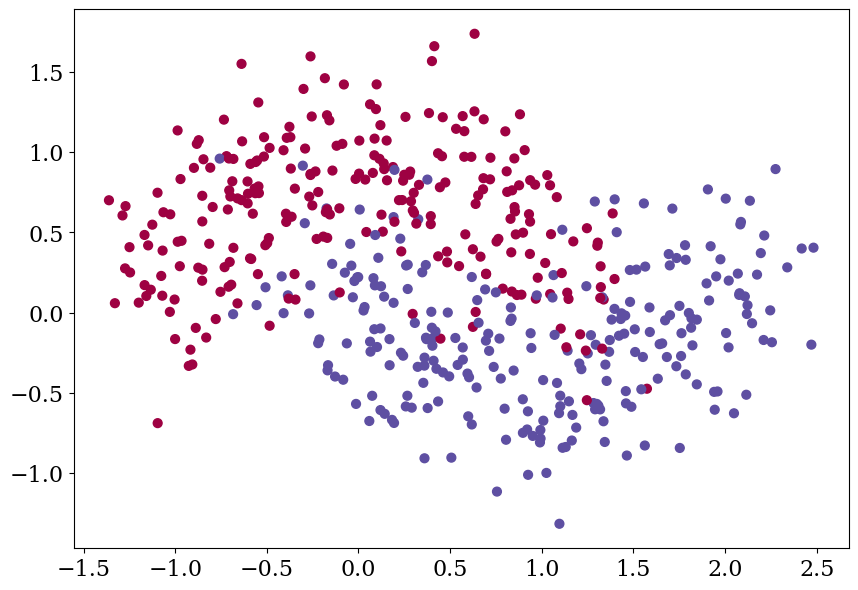

In [4]:
X = X.T
y = y.reshape(1, -1)

print(X.shape, y.shape)
# Plot the data

plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [5]:
y.shape

(1, 500)

In [6]:
nx, m = X.shape
ny = 1


## The Architecture

We'll use one hidden layer and one output layer. The model is

In [7]:
model = Sequential()
model.add(Input(input_shape=(nx,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: Sequential
_____________________________________________________________________________________
Name       # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-------  -----------  ---------------  -------------  --------------  ---------------
Input              2  ------           ------                      0  (2,)
Dense_1           10  (10, 2)          (10, 1)                    30  (10,)
Dense_2            1  (1, 10)          (1, 1)                     11  (1,)
Total Parameters: 41
_____________________________________________________________________________________


Let's compile and train the model:

In [8]:
model.compile(loss='binary_cross_entropy', metrics=['accuracy'], initializer="glorot")
history = model.fit(X, y, epochs=1000, lr=0.05, batch_size=32, verbose=0)

Let's plot the loss and accuracy curves:

In [9]:
def plot_history(history, metric, title = None, file_name=None):
    plt.plot(history[metric], label=metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.grid()
    if title:
        plt.title(title)
    plt.legend()
    if file_name:
        plt.savefig(os.path.join(SAVE_DIR, file_name))
    plt.show()

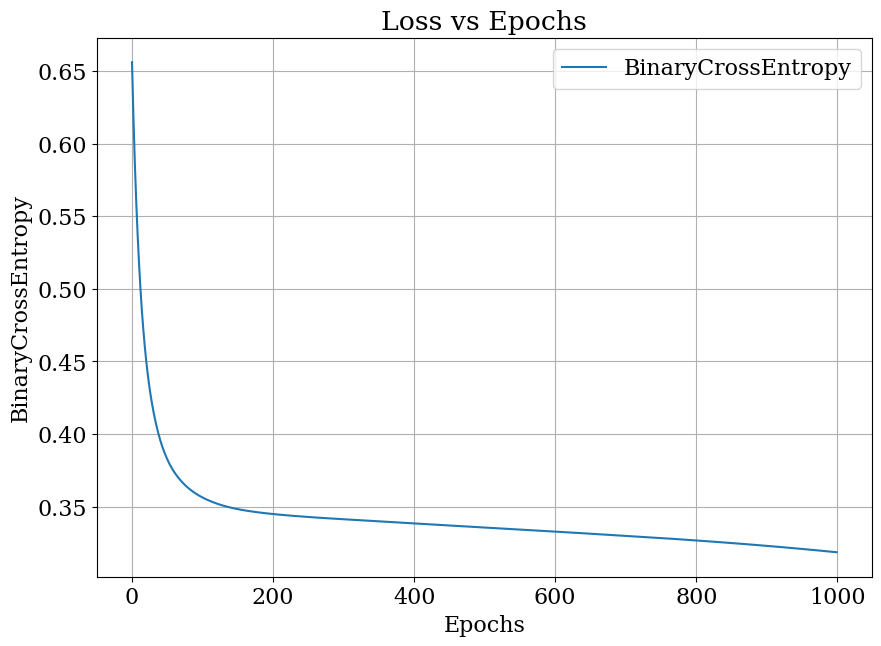

In [10]:
plot_history(history, 'BinaryCrossEntropy', title='Loss vs Epochs', file_name='0801.png')

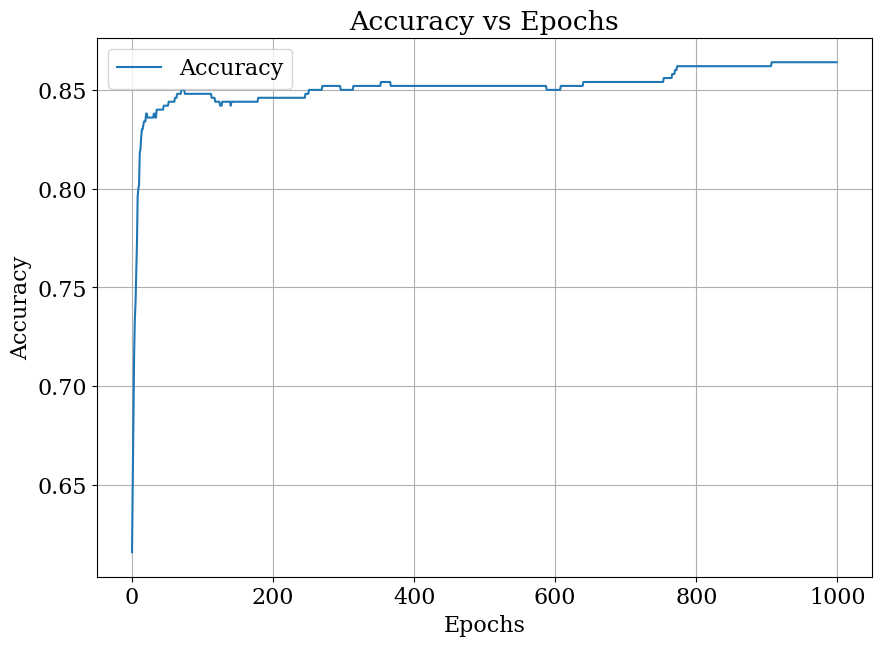

In [11]:
plot_history(history, 'Accuracy', title='Accuracy vs Epochs', file_name='0802.png')

## Decision Boundary

Now, we can plot the decision boundary:

In [12]:
# Plot the decision boundary
def plot_decision_boundary(model, X, y, title=None, file_name=None):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - .5, X[0, :].max() + .5
    y_min, y_max = X[1, :].min() - .5, X[1, :].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    if title:
        plt.title(title)
    if file_name:
        plt.savefig(os.path.join(SAVE_DIR, file_name))
    plt.show()

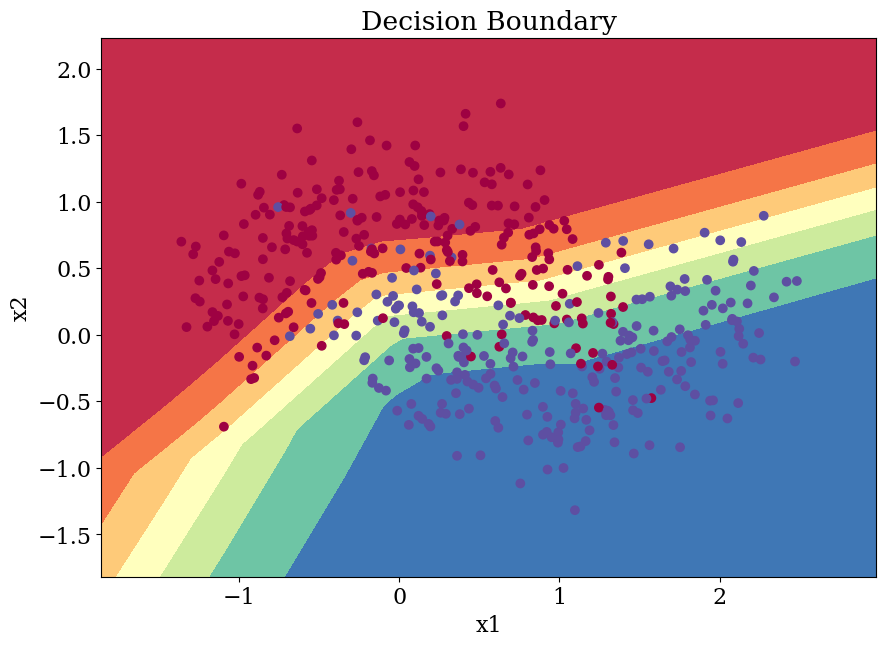

In [13]:
plot_decision_boundary(model, X, y, title='Decision Boundary', file_name='0803.png')

We can clearly see the nonlinearity of the decision boundary.